In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq


In [3]:
import my_test

data_dir = Path('/project/BDShackathon/data/processed_CosMx_data-fixed_images/')
sample_dir = data_dir / 'HNSCCBottom'

adata = sq.read.nanostring(
    path=sample_dir,
    counts_file="HNSCCBottom_exprMat_file.csv",
    meta_file="HNSCCBottom_metadata_file.csv",
    fov_file="HNSCCBottom_fov_positions_file_adjusted.csv",
)


/sfs/qumulo/qhome/mr2ep/hack_env/lib/python3.11/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [4]:
adata.var["Controls"] = adata.var_names.str.startswith("Negative") | adata.var_names.str.startswith("SystemControl")
sc.pp.calculate_qc_metrics(adata, qc_vars=["Controls"], inplace = True)
sc.pp.filter_cells(adata, min_counts=50)
sc.pp.filter_genes(adata, min_cells=400)

In [5]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
 
sc.pp.pca(adata, use_highly_variable=True)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/sfs/qumulo/qhome/mr2ep/hack_env/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
/sfs/qumulo/qhome/mr2ep/hack_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_4639/2577124135.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


In [6]:
adata.write('preprocessed_adata.h5ad')

# Checkpoint!

In [43]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import anndata

adata = anndata.read_h5ad('preprocessed_adata.h5ad')

In [28]:
obs = adata.obs[['fov', 'CenterX_global_px', 'CenterY_global_px']]
X = adata.X.toarray()
X = X.astype(np.float64)
var = adata.var

minimal_adata = anndata.AnnData(
    X = X,
    obs = obs,
    var = var
)

minimal_adata.obsm['spatial'] = np.array(minimal_adata.obs[['CenterY_global_px', 'CenterX_global_px']])

In [29]:
from utag import utag

utag_results = utag(
    minimal_adata,
    slide_key="fov",
    max_dist=15,
    normalization_mode='l1_norm',
    apply_clustering=True,
    clustering_method = 'leiden', 
)

Applying UTAG Algorithm...


/sfs/qumulo/qhome/mr2ep/hack_env/lib/python3.11/site-packages/parmap/parmap.py:123: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(exc))

100%|██████████| 158/158 [00:01<00:00, 125.45it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Applying Leiden Clustering at Resolution: 0.05...



 25%|██▌       | 1/4 [00:36<01:48, 36.17s/it]

Applying Leiden Clustering at Resolution: 0.1...



 50%|█████     | 2/4 [01:31<01:34, 47.42s/it]

Applying Leiden Clustering at Resolution: 0.3...


IOStream.flush timed out

 75%|███████▌  | 3/4 [02:43<00:58, 58.70s/it]

Applying Leiden Clustering at Resolution: 1.0...


IOStream.flush timed out
IOStream.flush timed out

100%|██████████| 4/4 [04:02<00:00, 60.64s/it]


In [48]:
utag_results

AnnData object with n_obs × n_vars = 68736 × 1055
    obs: 'fov', 'CenterX_global_px', 'CenterY_global_px', 'UTAG Label_leiden_0.05', 'UTAG Label_leiden_0.1', 'UTAG Label_leiden_0.3', 'UTAG Label_leiden_1.0'
    uns: 'pca', 'neighbors', 'UTAG Label_leiden_0.05', 'UTAG Label_leiden_0.1', 'UTAG Label_leiden_0.3', 'UTAG Label_leiden_1.0', 'UTAG Label_leiden_0.1_colors'
    obsm: 'spatial', 'X_pca', 'UTAG Label_leiden_0.05_probabilities', 'UTAG Label_leiden_0.1_probabilities', 'UTAG Label_leiden_0.3_probabilities', 'UTAG Label_leiden_1.0_probabilities'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [52]:
adata.obs['UTAG Label_leiden_0.05'] = utag_results.obs['UTAG Label_leiden_0.05']
adata.obs['UTAG Label_leiden_0.1'] = utag_results.obs['UTAG Label_leiden_0.1']
adata.obs['UTAG Label_leiden_0.3'] = utag_results.obs['UTAG Label_leiden_0.3']
adata.obs['UTAG Label_leiden_1.0'] = utag_results.obs['UTAG Label_leiden_1.0']

adata.write('preprocessed_adata-UTAG.h5ad')

In [1]:
import anndata
import pandas as pd

adata = anndata.read_h5ad('preprocessed_adata-UTAG.h5ad')
adata.obs.head()

,nn_099cd252.594c.4313.bce1.c5a1e082e25c_1_cluster_cluster_607ea837.811f.4b1b.b2a8.8ac1d9ecce1e_1,RNA_nbclust_10e16648.07fd.4570.b9cd.ffeb64f05a23_1_clusters,RNA_nbclust_10e16648.07fd.4570.b9cd.ffeb64f05a23_1_posterior_probability,cell,nCount_RNA,nFeature_RNA,nCount_negprobes,nFeature_negprobes,nn_9770d99f.df8e.4c6e.a1b5.a5de32389097_1_cluster_cluster_baf6a9bd.cc2d.494e.bced.538ee6a3c751_1,RNA_nbclust_0ad37c2b.edec.4d71.a066.07348a7c9f29_1_clusters,...,pct_counts_in_top_500_genes,total_counts_Controls,log1p_total_counts_Controls,pct_counts_Controls,n_counts,leiden,UTAG Label_leiden_0.1,UTAG Label_leiden_0.3,UTAG Label_leiden_1.0,UTAG Label_leiden_0.05
9_1,4,neutrophils,0.986549,c_1_1_9,61,46,0,0,5,neutrophils,...,100.0,3,1.386294,4.687500,64,12,0,3,2,0
12_1,5,monocytes.C,0.276775,c_1_1_12,74,61,0,0,7,macrophages,...,100.0,4,1.609438,5.128205,78,0,0,7,7,0
13_1,9,monocytes.C,0.563983,c_1_1_13,85,69,0,0,16,monocytes.C,...,100.0,14,2.708050,14.141414,99,4,1,4,12,1
16_1,15,monocytes.NC.I,0.582921,c_1_1_16,208,152,0,0,14,monocytes.NC.I,...,100.0,27,3.332205,11.489362,235,0,0,0,13,0
19_1,7,monocytes.C,0.602648,c_1_1_19,305,194,2,2,11,monocytes.C,...,100.0,41,3.737670,11.849711,346,13,0,0,2,0


In [2]:
metadata = pd.read_csv('/project/BDShackathon/data/fov_to_patient_mapping/fov_mapping.csv')
bottom_metadata = metadata[metadata['Slide'] == 'Bottom'].copy()
bottom_metadata['FOV'] = bottom_metadata['FOV'].astype('category')
bottom_metadata['Sample Location'] = bottom_metadata['Sample Location'].astype('category')

adata.obs['fov'] = adata.obs['fov'].astype(int)
adata.obs['fov'] = adata.obs['fov'].astype('category')

adata.obs['index'] = adata.obs.index
merged_df = pd.merge(adata.obs, bottom_metadata, left_on='fov', right_on='FOV', how='inner')
merged_df.set_index('index', inplace=True)


# Check if columns exist before updating
if 'Sample Location' in merged_df.columns:
    adata.obs['Sample Location'] = merged_df['Sample Location']
else:
    print("Sample Location column is missing in merged_df")

# Repeat for other columns
if 'Patient Number' in merged_df.columns:
    adata.obs['Patient Number'] = merged_df['Patient Number']
if 'Sample' in merged_df.columns:
    adata.obs['Sample'] = merged_df['Sample']

adata.obs['fov'] = adata.obs['fov'].astype(str) # squidpy expects strings

adata.obs.head()

,nn_099cd252.594c.4313.bce1.c5a1e082e25c_1_cluster_cluster_607ea837.811f.4b1b.b2a8.8ac1d9ecce1e_1,RNA_nbclust_10e16648.07fd.4570.b9cd.ffeb64f05a23_1_clusters,RNA_nbclust_10e16648.07fd.4570.b9cd.ffeb64f05a23_1_posterior_probability,cell,nCount_RNA,nFeature_RNA,nCount_negprobes,nFeature_negprobes,nn_9770d99f.df8e.4c6e.a1b5.a5de32389097_1_cluster_cluster_baf6a9bd.cc2d.494e.bced.538ee6a3c751_1,RNA_nbclust_0ad37c2b.edec.4d71.a066.07348a7c9f29_1_clusters,...,n_counts,leiden,UTAG Label_leiden_0.1,UTAG Label_leiden_0.3,UTAG Label_leiden_1.0,UTAG Label_leiden_0.05,index,Sample Location,Patient Number,Sample
9_1,4,neutrophils,0.986549,c_1_1_9,61,46,0,0,5,neutrophils,...,64,12,0,3,2,0,9_1,C,1,T4a N0-C
12_1,5,monocytes.C,0.276775,c_1_1_12,74,61,0,0,7,macrophages,...,78,0,0,7,7,0,12_1,C,1,T4a N0-C
13_1,9,monocytes.C,0.563983,c_1_1_13,85,69,0,0,16,monocytes.C,...,99,4,1,4,12,1,13_1,C,1,T4a N0-C
16_1,15,monocytes.NC.I,0.582921,c_1_1_16,208,152,0,0,14,monocytes.NC.I,...,235,0,0,0,13,0,16_1,C,1,T4a N0-C
19_1,7,monocytes.C,0.602648,c_1_1_19,305,194,2,2,11,monocytes.C,...,346,13,0,0,2,0,19_1,C,1,T4a N0-C


In [14]:
adata.write('preprocessed_adata-UTAG-metadata_bottom.h5ad')

In [1]:
import anndata
import pandas as pd
import squidpy as sq
import matplotlib.pyplot as plt

adata = anndata.read_h5ad('preprocessed_adata-UTAG-metadata_bottom.h5ad')
adata.obs.head()

,nn_099cd252.594c.4313.bce1.c5a1e082e25c_1_cluster_cluster_607ea837.811f.4b1b.b2a8.8ac1d9ecce1e_1,RNA_nbclust_10e16648.07fd.4570.b9cd.ffeb64f05a23_1_clusters,RNA_nbclust_10e16648.07fd.4570.b9cd.ffeb64f05a23_1_posterior_probability,cell,nCount_RNA,nFeature_RNA,nCount_negprobes,nFeature_negprobes,nn_9770d99f.df8e.4c6e.a1b5.a5de32389097_1_cluster_cluster_baf6a9bd.cc2d.494e.bced.538ee6a3c751_1,RNA_nbclust_0ad37c2b.edec.4d71.a066.07348a7c9f29_1_clusters,...,n_counts,leiden,UTAG Label_leiden_0.1,UTAG Label_leiden_0.3,UTAG Label_leiden_1.0,UTAG Label_leiden_0.05,index,Sample Location,Patient Number,Sample
9_1,4,neutrophils,0.986549,c_1_1_9,61,46,0,0,5,neutrophils,...,64,12,0,3,2,0,9_1,C,1,T4a N0-C
12_1,5,monocytes.C,0.276775,c_1_1_12,74,61,0,0,7,macrophages,...,78,0,0,7,7,0,12_1,C,1,T4a N0-C
13_1,9,monocytes.C,0.563983,c_1_1_13,85,69,0,0,16,monocytes.C,...,99,4,1,4,12,1,13_1,C,1,T4a N0-C
16_1,15,monocytes.NC.I,0.582921,c_1_1_16,208,152,0,0,14,monocytes.NC.I,...,235,0,0,0,13,0,16_1,C,1,T4a N0-C
19_1,7,monocytes.C,0.602648,c_1_1_19,305,194,2,2,11,monocytes.C,...,346,13,0,0,2,0,19_1,C,1,T4a N0-C


In [4]:
bottom_utag_labels = adata.obs[['cell', 'UTAG Label_leiden_0.1']]
bottom_utag_labels.to_csv('utag_labels_MPR.csv')

/sfs/qumulo/qhome/mr2ep/hack_env/lib/python3.11/site-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/sfs/qumulo/qhome/mr2ep/hack_env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


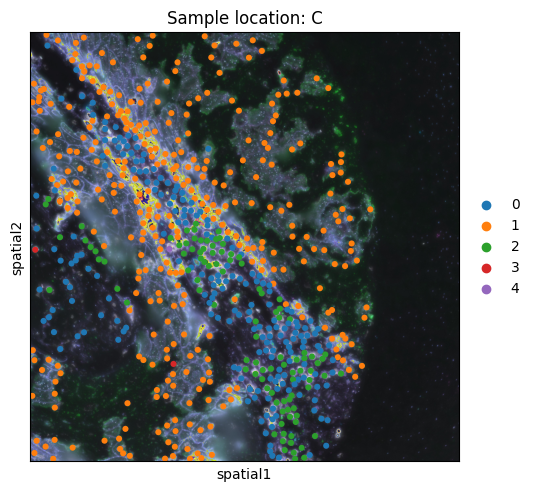

/sfs/qumulo/qhome/mr2ep/hack_env/lib/python3.11/site-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]


In [ ]:
# subset adata for a single patient, and look at the core, edge, and distal

patient_1_adata = adata[adata.obs['Patient Number'] == 1]

for loc in ['C', 'E', 'P']:
    adata_loc = patient_1_adata[patient_1_adata.obs['Sample Location'] == loc]
    ad_loc_fov = adata_loc.obs['fov'].unique()[5]
    adata_fov = adata_loc[adata_loc.obs['fov'] == ad_loc_fov]
    
    del adata_loc
    
    category = str(adata_fov.obs['Sample Location'].unique()[0])
    
    sq.pl.spatial_scatter(adata_fov, 
                          library_id=str(ad_loc_fov),
                          library_key='fov', 
                          seg_cell_id='seg_cell_ID',
                          color='UTAG Label_leiden_0.1',
                          size=60,
                          title="Sample location: "+category,
                          edges_color=None,
                         )
    plt.show()

    del adata_fov


## Compare the frequency of the composition in each of the UTAG leiden clusters for 0.1 using the annotated 'aud_predicted.csv' cell types

In [3]:
cell_types = pd.read_csv('aud_predicted.csv')
cell_types.set_index('Cell', inplace=True)
cell_types.head()

,Unnamed: 0,PredictedID
Cell,,
2_1,2_1,T cells
3_1,3_1,T cells
6_1,6_1,T cells
7_1,7_1,T cells
9_1,9_1,T cells


In [4]:
adata.obs['PredictedID'] = cell_types['PredictedID']
adata.obs.head()

,nn_099cd252.594c.4313.bce1.c5a1e082e25c_1_cluster_cluster_607ea837.811f.4b1b.b2a8.8ac1d9ecce1e_1,RNA_nbclust_10e16648.07fd.4570.b9cd.ffeb64f05a23_1_clusters,RNA_nbclust_10e16648.07fd.4570.b9cd.ffeb64f05a23_1_posterior_probability,cell,nCount_RNA,nFeature_RNA,nCount_negprobes,nFeature_negprobes,nn_9770d99f.df8e.4c6e.a1b5.a5de32389097_1_cluster_cluster_baf6a9bd.cc2d.494e.bced.538ee6a3c751_1,RNA_nbclust_0ad37c2b.edec.4d71.a066.07348a7c9f29_1_clusters,...,leiden,UTAG Label_leiden_0.1,UTAG Label_leiden_0.3,UTAG Label_leiden_1.0,UTAG Label_leiden_0.05,index,Sample Location,Patient Number,Sample,PredictedID
9_1,4,neutrophils,0.986549,c_1_1_9,61,46,0,0,5,neutrophils,...,12,0,3,2,0,9_1,C,1,T4a N0-C,T cells
12_1,5,monocytes.C,0.276775,c_1_1_12,74,61,0,0,7,macrophages,...,0,0,7,7,0,12_1,C,1,T4a N0-C,B cells
13_1,9,monocytes.C,0.563983,c_1_1_13,85,69,0,0,16,monocytes.C,...,4,1,4,12,1,13_1,C,1,T4a N0-C,Epithelial
16_1,15,monocytes.NC.I,0.582921,c_1_1_16,208,152,0,0,14,monocytes.NC.I,...,0,0,0,13,0,16_1,C,1,T4a N0-C,Epithelial
19_1,7,monocytes.C,0.602648,c_1_1_19,305,194,2,2,11,monocytes.C,...,13,0,0,2,0,19_1,C,1,T4a N0-C,Epithelial


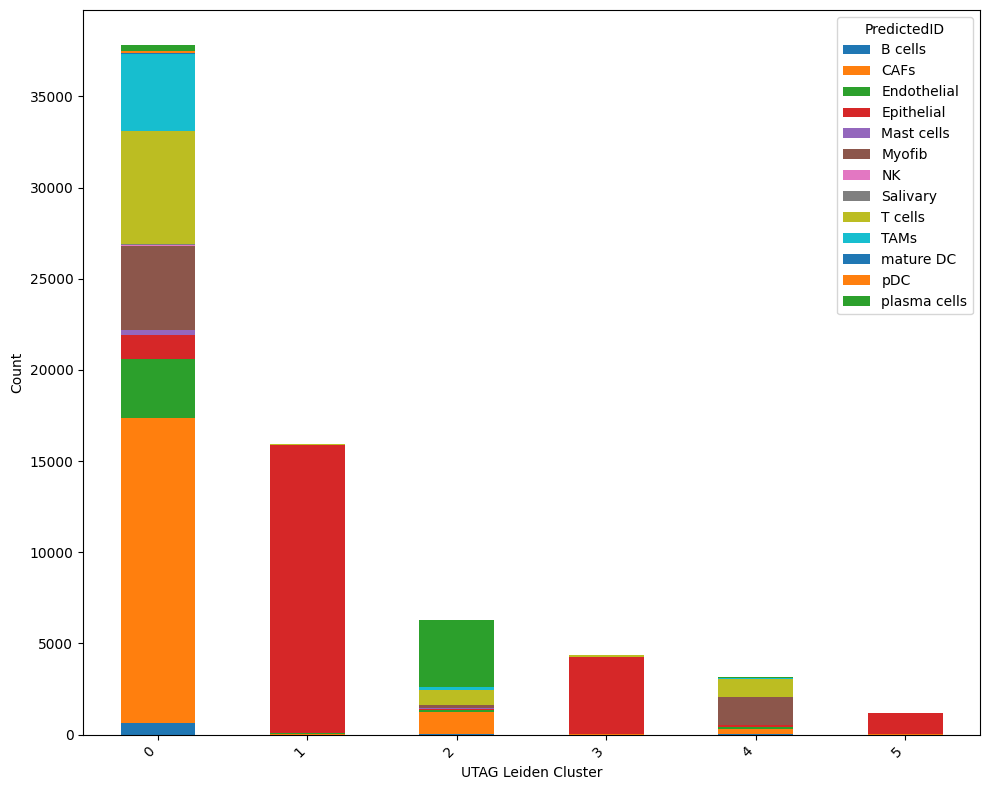

PredictedID,B cells,CAFs,Endothelial,Epithelial,Mast cells,Myofib,NK,Salivary,T cells,TAMs,mature DC,pDC,plasma cells
0,615.0,16771.0,3193.0,1357.0,259.0,4580.0,81.0,44.0,6208.0,4238.0,33.0,98.0,368.0
1,1.0,56.0,2.0,15801.0,0.0,13.0,0.0,1.0,67.0,20.0,0.0,0.0,0.0
2,35.0,1215.0,94.0,64.0,49.0,167.0,7.0,0.0,796.0,187.0,0.0,19.0,3623.0
3,0.0,8.0,7.0,4242.0,0.0,17.0,0.0,0.0,83.0,9.0,0.0,1.0,0.0
4,4.0,287.0,114.0,94.0,1.0,1545.0,0.0,38.0,969.0,43.0,3.0,4.0,45.0


In [5]:
import matplotlib.pyplot as plt

cluster_compositions = {}
for cluster in adata.obs['UTAG Label_leiden_0.1'].unique():
    cluster_adata = adata[adata.obs['UTAG Label_leiden_0.1'] == cluster]
    cluster_compositions[cluster] = cluster_adata.obs['PredictedID'].value_counts() 
    

cluster_comp_df = pd.DataFrame(cluster_compositions)
cluster_comp_df.fillna(0, inplace=True)
cluster_comp_df = cluster_comp_df.T

ax = cluster_comp_df.plot(kind='bar', stacked=True, figsize=(10, 8))
ax.set_ylabel('Count')
ax.set_xlabel('UTAG Leiden Cluster')

# Show the plot
plt.xticks(rotation=45, ha="right")  # Rotate labels to avoid overlap
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

cluster_comp_df.head()


## What is the amount of panck associated with each cluster?

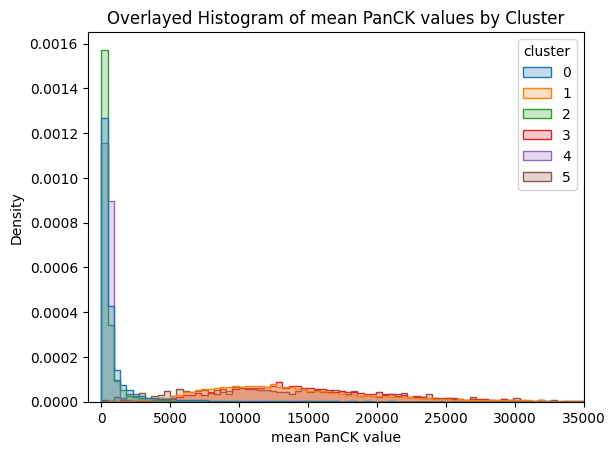

In [6]:
import seaborn as sns

data = []

for i, cluster in enumerate(adata.obs['UTAG Label_leiden_0.1'].unique()):
    cluster_adata = adata[adata.obs['UTAG Label_leiden_0.1'] == cluster]
    for value in cluster_adata.obs['Mean.PanCK'].values:
        data.append({'cluster':cluster, 
                     'value' : value})
    
panck_df = pd.DataFrame(data)
sns.histplot(data=panck_df, x='value', hue='cluster', element='step', stat='density', common_norm=False)
plt.xlim([-1000,35000])
plt.title('Overlayed Histogram of mean PanCK values by Cluster')
plt.xlabel('mean PanCK value')
plt.ylabel('Density')
plt.show()

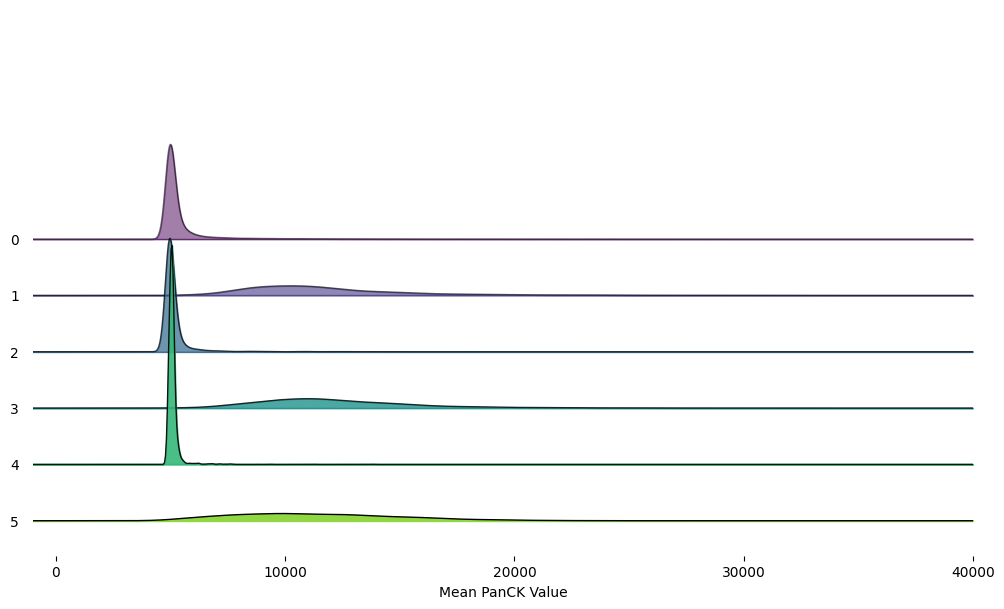

In [15]:
import joypy
import matplotlib.pyplot as plt

# Create the ridgeline plot
fig, axes = joypy.joyplot(panck_df, by='cluster', column='value', figsize=(10, 6), 
                          overlap=3, colormap=plt.cm.viridis, fade=True, linewidth=1)

# Adding titles and labels
plt.xlabel('Mean PanCK Value')
plt.ylabel('Cluster')
plt.xlim([-1000, 40000])

plt.show()


# Clusters 0, 2, and 4 look like the stroma and the remainder is cancer!!

Text(0, 0.5, 'Cluster Counts')

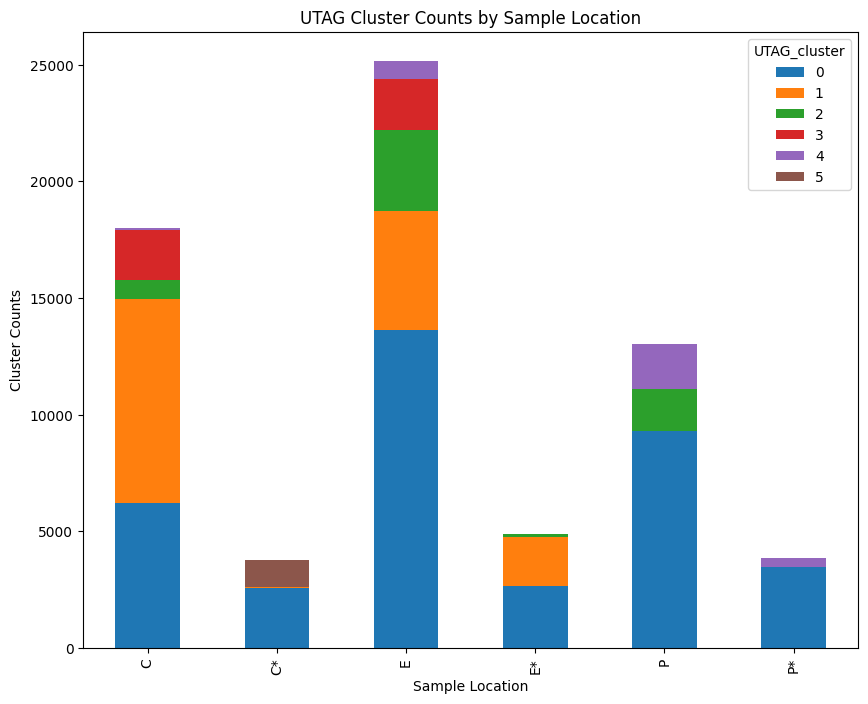

In [44]:
# For each tumor location, plot the UTAG cluster composition:

data = []

for i, sample_loc in enumerate(adata.obs['Sample Location'].unique()):
    sample_loc_adata = adata[adata.obs['Sample Location'] == sample_loc]
    
    for cluster_id, counts in sample_loc_adata.obs['UTAG Label_leiden_0.1'].value_counts().items():
        data.append({'sample_loc' : sample_loc, 
                     'UTAG_cluster' : cluster_id,
                     'cluster_counts' : counts,
                    })

location_comp_df = pd.DataFrame(data)
location_comp_df = location_comp_df.pivot_table(index='sample_loc', columns='UTAG_cluster', values='cluster_counts', fill_value=0)

# sns.histplot(location_comp_df, x='sample_loc', y=

ax = location_comp_df.plot(kind='bar', stacked=True, figsize=(10, 8))
ax.set_title('UTAG Cluster Counts by Sample Location')
ax.set_xlabel('Sample Location')
ax.set_ylabel('Cluster Counts')


### The sample location label keys:
- C: Center or core
- E: Leading edge or edge
- P: periphery or 'distal'

### Star note:
The stars correspond to the sequential slice from the bottom chip that is duplicated from the top chip. Unstarred locations are 

# TODO: 
1. Look at (per punch) percent celllularity
    - need to collect FOVs in a punch
2. Look at the cancer (called epithelial) in the 0 UTAG cluster
3. ELBO plot for cluster (resolution param)
4. Compare the stars to look at the profiles of the sequential section
    - Look at the sequential sections with the fit UTAG
    - Do the UTAG seperately for the top vs bottom and them compare the results